## Predictions on New Data

### Load in classifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from torch import nn
from collections import defaultdict
from PIL import Image

In [3]:
def acc_seeds(input, target):
    target = target.squeeze(1)
    mask = target != 0 #not interested in background
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [4]:
path = Path('/home/suze/seed_images/Data_for_ML_Test/test_model/Oat_test')

In [7]:
learn = load_learner(path, file='Oat_Big.pkl')

In [8]:
#learn.data.single_ds.tfmargs['size'] = None #ensure match to new image size, 
#image sizes containing uneven numbers cannot be handled, will be fixed in v2
#reduces result accuracy

### Load in Data & Predict

In [9]:
def predict_new(path_to_new, path_to_predic):
    path_to_new = Path(path_to_new).glob('*.tif')
    path_to_predic = Path(path_to_predic)
    if not os.path.exists(path_to_predic):
        os.makedirs(path_to_predic)
    img_array = np.random.rand(100, 100, 3) * 255
    for p in path_to_new:
        label = p.name
        img = open_image(p)
        prediction = learn.predict(img)
        pred_argmax = prediction[1]
        pred_argmax = pred_argmax.numpy()
        rescaled = (255.0/pred_argmax.max()*(pred_argmax - pred_argmax.min())).astype(np.uint8)
        im = Image.fromarray(rescaled[0])
        im.save(path_to_predic/label)
        #return(p)

In [10]:
test = predict_new(path/'PredictImages', path/'LabelsPredicted_big2')
#print(test)

/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/suze/miniconda3/envs/learnfastai/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0

In [11]:
img = open_image(path/'PredictImages/Om_1_7_filtered0004.tif')

In [12]:
prediction = learn.predict(img)
#prediction

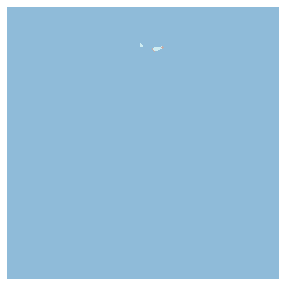

In [13]:
prediction[0].show(figsize=(5,5))

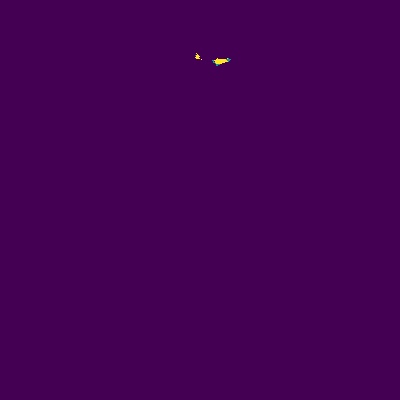

In [23]:
#pred = prediction[2]
prediction[1]

In [15]:
pred_argmax = prediction[1]
pred_argmax = pred_argmax.numpy()
pred_argmax

array([[[0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0],
        [0, 0, 0, 0, ..., 0, 0, 0, 0]]])

In [16]:
img_array = np.random.rand(100, 100, 3) * 255
rescaled = (255.0/pred_argmax.max() * (pred_argmax - pred_argmax.min())).astype(np.uint8)

In [17]:
rescaled[0]

array([[0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0]], dtype=uint8)

In [18]:
im = Image.fromarray(rescaled[0])

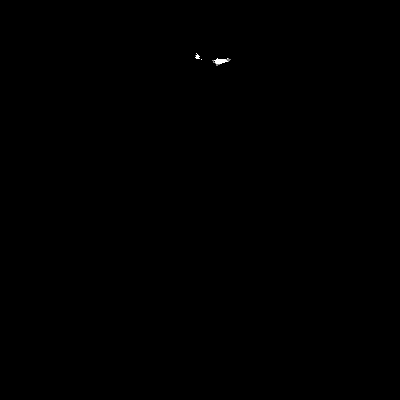

In [19]:
im

In [ ]:
im.save('test.tiff')